
# LLMs: Introduction to Text Data (Python)

**Dataset:** `'/anvil/projects/tdm/data/amazon/music.txt'` (~2GB).  
We stream the file to avoid loading it entirely.

**Implement:**
- `read_lines` (chunked reader)
- `clean_text` (escape decoding & normalization)
- `word_count` + summary stats on first 500 reviews
- `char_freq` + `plot_char_freq`
- `caesar_cipher`


In [2]:
from pathlib import Path
import codecs
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = Path('/anvil/projects/tdm/data/amazon/music.txt')
FALLBACK_PATH = Path('music_fallback.txt')



## Question 1 Treaming Reader


In [3]:
def read_lines(file_path, n, start=0):
    lines = []
    with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
        for i, line in enumerate(f):
            if i < start:
                continue
            if i >= start + n:
                break
            lines.append(line if line.endswith('\n') else line)
    return lines

# Tests (content depends on dataset availability)
print(read_lines(USE_PATH, 2))
print(read_lines(USE_PATH, 2, 50))


['"I love this CD.  So inspiring!"\n', '"Love it!!  Great seller!"\n']
['"Item arrived quickly and was as described!"\n', '"I love this CD!  It was a Christmas gift from my husband and he did a great job picking it out for me!"\n']



## Question 2 - Cleaning Function & Inspecting Lines 68 and 150


In [4]:
def clean_text(text: str) -> str:
    if text is None:
        return ""
    try:
        decoded = codecs.decode(text, 'unicode_escape')
    except Exception:
        decoded = text
    s = decoded.strip()
    if len(s) >= 2 and s[0] == '"' and s[-1] == '"':
        s = s[1:-1]
    s = s.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    s = ' '.join(s.split())
    return s

# Tests
print(clean_text('"I love this CD.  So inspiring!"'))
print(clean_text('"Amazing!\nIt is wonderful"'))
print(clean_text('"Contractions like can\'t and won\'t should also work"'))

# Inspect requested indices
for idx in (68, 150):
    lines = read_lines(USE_PATH, 1, idx)
    if lines:
        raw = lines[0]
        print(f"Raw[{idx}]:", repr(raw[:120] + ('...' if len(raw)>120 else '')))
        print(f"Clean[{idx}]:", clean_text(raw)[:120] + ('...' if len(clean_text(raw))>120 else ''))
    else:
        print(f"Index {idx} not available in current file.")


I love this CD. So inspiring!
Amazing! It is wonderful
Contractions like can't and won't should also work
Raw[68]: '"Loved everything ~  arrangements, story line.\\nNegative  ?? ?  Could have listened for another hour."\n'
Clean[68]: Loved everything ~ arrangements, story line. Negative ?? ? Could have listened for another hour.
Raw[150]: '"I love this CD! It is always part of my Christmas music. The driving rhythms and story told mark it as originating from...'
Clean[150]: I love this CD! It is always part of my Christmas music. The driving rhythms and story told mark it as originating from ...



## Question 3 — Word Count & Summary over First 500 Reviews


In [5]:

def word_count(text: str) -> int:
    return len(text.split()) if text else 0

# Tests
print(word_count('I love this CD.  So inspiring!'))        # 6
print(word_count('Amazing! It is wonderful'))              # 4
print(word_count("Contractions like can't and won't should also work"))  # 8

# Stats on first 500 (or fewer if file smaller)
N = 500
first_lines = read_lines(USE_PATH, N, 0)
cleaned = [clean_text(s) for s in first_lines]
counts = [word_count(s) for s in cleaned]

if counts:
    avg_wc = float(np.mean(counts))
    max_wc = int(np.max(counts))
    min_wc = int(np.min(counts))
    print(f"Average word count (first {len(counts)}): {avg_wc:.2f}")
    print("Max word count:", max_wc)
    print("Min word count:", min_wc)
else:
    print("No lines to analyze in this environment.")


6
4
8
Average word count (first 500): 25.22
Max word count: 898
Min word count: 1



## Question 4 — Character Frequencies & Plot


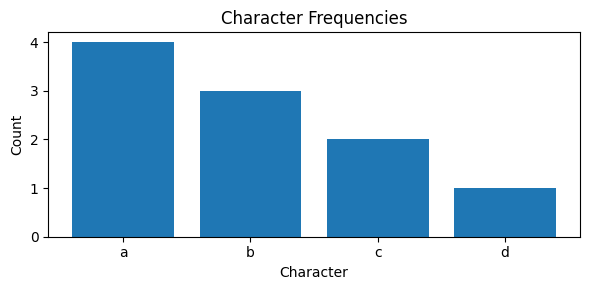

In [6]:

def char_freq(text: str):
    d = {}
    for ch in text:
        d[ch] = d.get(ch, 0) + 1
    return d

def plot_char_freq(freq_dict):
    if not freq_dict:
        print("Empty dictionary.")
        return
    keys = list(freq_dict.keys())
    vals = [freq_dict[k] for k in keys]
    plt.figure(figsize=(6,3))
    plt.bar(keys, vals)
    plt.title("Character Frequencies")
    plt.xlabel("Character")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Test plot
plot_char_freq(char_freq('aaaabbbccd'))



## Question 5 — Caesar Cipher


In [7]:
def caesar_cipher(text: str, shift: int) -> str:
    shift %= 26
    out = []
    for ch in text:
        if 'A' <= ch <= 'Z':
            idx = ord(ch) - ord('A')
            out.append(chr(ord('A') + (idx + shift) % 26))
        else:
            out.append(ch)
    return ''.join(out)

print(caesar_cipher('ABCD', 3))          # DEFG
print(caesar_cipher('DEFG', -3))         # ABCD
print(caesar_cipher('HELLO WORLD', 5))   # MJQQT BTWQI


DEFG
ABCD
MJQQT BTWQI
